In [33]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2d110e94-72f0-4b8c-a102-b1fff376e47f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-12T02:05:47.167Z', 'error_code': 0, 'error_message': None, 'elapsed': 44, 'credit_count': 1, 'notice': None, 'total_count': 10029}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11631, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [112]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-08-12T02:05:47.167Z,0,None,44,1,None,10029


In [55]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973872e+07,1.973872e+07,False,NaN,1,NaN,NaN,None,2024-08-12T02:05:00.000Z,58490.231313,2.439360e+10,68.9631,0.316863,-4.258568,8.701766,1.043484,-13.897827,-6.635643,1.154522e+12,56.1822,1.228295e+12,None,2024-08-12T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:11:21.989569
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202703e+08,1.202703e+08,True,NaN,2,NaN,NaN,None,2024-08-12T02:04:00.000Z,2549.738746,1.460855e+10,69.4705,0.620206,-2.995456,10.803292,-18.534944,-27.954371,-13.497181,3.066578e+11,14.9139,3.066578e+11,None,2024-08-12T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:11:21.989569
2,825,Tether USDt,USDT,tether,93926,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-12T02:04:00.000Z,1.000971,4.441313e+10,52.3163,0.090817,0.055984,0.118734,0.068822,0.092365,0.115409,1.157509e+11,5.6294,1.171818e+11,None,2024-08-12T02:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 09:11:21.989569
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459365e+08,1.459365e+08,False,NaN,4,NaN,NaN,None,2024-08-12T02:04:00.000Z,507.328826,1.602885e+09,15.8328,0.352590,-3.849941,12.692521,-4.897996,-16.952435,-13.940314,7.403781e+10,3.6029,7.403781e+10,None,2024-08-12T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:11:21.989569
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667349e+08,5.821104e+08,True,NaN,5,NaN,NaN,None,2024-08-12T02:04:00.000Z,143.573601,2.606022e+09,81.6792,0.574782,-7.448801,10.302122,3.232338,-5.902420,-2.971816,6.701082e+10,3.2590,8.357569e+10,None,2024-08-12T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:11:21.989569
5,3408,USDC,USDC,usd-coin,21469,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.445755e+10,3.445755e+10,False,NaN,6,NaN,NaN,None,2024-08-12T02:04:00.000Z,1.000538,4.597005e+09,78.4266,0.059102,0.041329,0.055043,0.048118,0.031516,0.053847,3.447609e+10,1.6767,3.447609e+10,None,2024-08-12T02:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 09:11:21.989569
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-12T02:05:00.000Z,0.560769,1.263383e+09,13.5118,0.965581,-5.182995,19.164178,16.857316,14.938729,10.956969,3.146158e+10,1.5309,5.607688e+10,None,2024-08-12T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:11:21.989569
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518479e+09,5.110357e+09,True,NaN,8,3.414167e+09,2.113558e+10,None,2024-08-12T02:04:00.000Z,6.190554,3.018556e+08,2.0951,-0.145097,-7.674796,11.184253,-15.840388,-18.003326,-10.858869,1.559078e+10,0.7586,3.163594e+10,None,2024-08-12T02:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:11:21.989569
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me.

In [ ]:
# Automation

In [99]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2d110e94-72f0-4b8c-a102-b1fff376e47f',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'D:\Python\API.csv'):
        df.to_csv(r'D:\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Python\API.csv', mode='a', header=False)

In [101]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api Runner completed')
    sleep(60)
exit()

Api Runner completed
Api Runner completed
Api Runner completed


KeyboardInterrupt: 

In [104]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973872e+07,1.973872e+07,False,NaN,1,NaN,NaN,None,2024-08-12T02:42:00.000Z,58366.874486,2.458632e+10,71.0348,-0.338276,-4.400259,8.235250,0.784200,-14.021469,-6.737489,1.152087e+12,56.2247,1.225704e+12,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202703e+08,1.202703e+08,True,NaN,2,NaN,NaN,None,2024-08-12T02:42:00.000Z,2537.759603,1.473506e+10,72.4552,-0.479142,-3.379770,11.887941,-18.804666,-27.904083,-14.024052,3.052171e+11,14.8952,3.052171e+11,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
2,825,Tether USDt,USDT,tether,93927,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.156386e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-12T02:42:00.000Z,1.000198,4.469297e+10,53.8865,-0.061193,-0.000764,0.004251,-0.005077,0.002996,0.037457,1.156615e+11,5.6445,1.170913e+11,None,2024-08-12T02:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 09:44:31.195639
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459365e+08,1.459365e+08,False,NaN,4,NaN,NaN,None,2024-08-12T02:42:00.000Z,506.132303,1.604051e+09,16.1274,0.082476,-4.075007,13.920625,-4.994121,-17.354225,-14.064226,7.386320e+10,3.6047,7.386320e+10,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.667349e+08,5.821104e+08,True,NaN,5,NaN,NaN,None,2024-08-12T02:42:00.000Z,143.253663,2.619340e+09,85.3923,0.002695,-7.434101,11.716646,3.268793,-6.426022,-2.560048,6.686148e+10,3.2630,8.338944e+10,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
5,3408,USDC,USDC,usd-coin,21469,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.445822e+10,3.445822e+10,False,NaN,6,NaN,NaN,None,2024-08-12T02:42:00.000Z,0.999986,4.632645e+09,81.5434,-0.005251,-0.001564,-0.024930,-0.004466,-0.033364,-0.007431,3.445775e+10,1.6816,3.445775e+10,None,2024-08-12T02:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 09:44:31.195639
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-12T02:43:00.000Z,0.560730,1.273808e+09,13.9357,-0.002488,-5.183739,19.050148,16.443066,14.653025,10.826596,3.145942e+10,1.5353,5.607304e+10,None,2024-08-12T02:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518481e+09,5.110359e+09,True,NaN,8,3.414167e+09,2.101789e+10,None,2024-08-12T02:42:00.000Z,6.156082,3.007280e+08,1.3244,-0.616469,-7.948066,13.710513,-16.324607,-19.303265,-11.345497,1.550397e+10,0.7567,3.145979e+10,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-e

In [114]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [122]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19738721.00000,19738721.00000,False,NaN,1,NaN,NaN,None,2024-08-12T02:42:00.000Z,58366.87449,24586319998.83419,71.03480,-0.33828,-4.40026,8.23525,0.78420,-14.02147,-6.73749,1152087451128.31641,56.22470,1225704364213.60010,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
1,1027,Ethereum,ETH,ethereum,9204,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120270277.79627,120270277.79627,True,NaN,2,NaN,NaN,None,2024-08-12T02:42:00.000Z,2537.75960,14735061446.31907,72.45520,-0.47914,-3.37977,11.88794,-18.80467,-27.90408,-14.02405,305217052416.53491,14.89520,305217052416.53003,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
2,825,Tether USDt,USDT,tether,93927,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115638558844.54697,117068077122.29233,True,NaN,3,NaN,NaN,None,2024-08-12T02:42:00.000Z,1.00020,44692969281.83732,53.88650,-0.06119,-0.00076,0.00425,-0.00508,0.00300,0.03746,115661497952.99838,5.64450,117091299802.89000,None,2024-08-12T02:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-12 09:44:31.195639
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936538.49368,145936538.49368,False,NaN,4,NaN,NaN,None,2024-08-12T02:42:00.000Z,506.13230,1604050885.20256,16.12740,0.08248,-4.07501,13.92062,-4.99412,-17.35422,-14.06423,73863196383.80977,3.60470,73863196383.81000,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466734856.80338,582110352.51072,True,NaN,5,NaN,NaN,None,2024-08-12T02:42:00.000Z,143.25366,2619340362.22255,85.39230,0.00269,-7.43410,11.71665,3.26879,-6.42602,-2.56005,66861478023.33923,3.26300,83389440437.59000,None,2024-08-12T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
5,3408,USDC,USDC,usd-coin,21469,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34458220626.11927,34458220626.11927,False,NaN,6,NaN,NaN,None,2024-08-12T02:42:00.000Z,0.99999,4632644967.83713,81.54340,-0.00525,-0.00156,-0.02493,-0.00447,-0.03336,-0.00743,34457745176.67973,1.68160,34457745176.68000,None,2024-08-12T02:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-12 09:44:31.195639
6,52,XRP,XRP,xrp,1364,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-12T02:43:00.000Z,0.56073,1273808217.99010,13.93570,-0.00249,-5.18374,19.05015,16.44307,14.65303,10.82660,31459420388.94632,1.53530,56073038870.82000,None,2024-08-12T02:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-12 09:44:31.195639
7,11419,Toncoin,TON,toncoin,501,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518480571.16228,5110358669.11564,True,NaN,8,3414166606.00000,21017889479.50618,None,2024-08-12T02:42:00.000Z,6.15608,300727960.97595,1.32440,-0.61647,-7.94807,13.71051,-16.32461,-19.30327,-11.34550,15503972831.30489,0.75670,31459786853.80000,No

In [118]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.33828,-4.40026,8.23525,0.78420,-14.02147,-6.73749
Ethereum,-0.47914,-3.37977,11.88794,-18.80467,-27.90408,-14.02405
Tether USDt,-0.06119,-0.00076,0.00425,-0.00508,0.00300,0.03746
BNB,0.08248,-4.07501,13.92062,-4.99412,-17.35422,-14.06423
Solana,0.00269,-7.43410,11.71665,3.26879,-6.42602,-2.56005
USDC,-0.00525,-0.00156,-0.02493,-0.00447,-0.03336,-0.00743
XRP,-0.00249,-5.18374,19.05015,16.44307,14.65303,10.82660
Toncoin,-0.61647,-7.94807,13.71051,-16.32461,-19.30327,-11.34550
Dogecoin,-0.16640,-6.32994,11.56334,-5.58918,-29.48881,-31.73803


In [124]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.33828
              quote.USD.percent_change_24h    -4.40026
              quote.USD.percent_change_7d      8.23525
              quote.USD.percent_change_30d     0.78420
              quote.USD.percent_change_60d   -14.02147
              quote.USD.percent_change_90d    -6.73749
Ethereum      quote.USD.percent_change_1h     -0.47914
              quote.USD.percent_change_24h    -3.37977
              quote.USD.percent_change_7d     11.88794
              quote.USD.percent_change_30d   -18.80467
              quote.USD.percent_change_60d   -27.90408
              quote.USD.percent_change_90d   -14.02405
Tether USDt   quote.USD.percent_change_1h     -0.06119
              quote.USD.percent_change_24h    -0.00076
              quote.USD.percent_change_7d      0.00425
              quote.USD.percent_change_30d    -0.00508
              quote.USD.percent_change_60d     0.00300
              quote.US

In [126]:
type(df4)

pandas.core.series.Series

In [128]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.33828
             quote.USD.percent_change_24h  -4.40026
             quote.USD.percent_change_7d    8.23525
             quote.USD.percent_change_30d   0.78420
             quote.USD.percent_change_60d -14.02147
             quote.USD.percent_change_90d  -6.73749
Ethereum     quote.USD.percent_change_1h   -0.47914
             quote.USD.percent_change_24h  -3.37977
             quote.USD.percent_change_7d   11.88794
             quote.USD.percent_change_30d -18.80467
             quote.USD.percent_change_60d -27.90408
             quote.USD.percent_change_90d -14.02405
Tether USDt  quote.USD.percent_change_1h   -0.06119
             quote.USD.percent_change_24h  -0.00076
             quote.USD.percent_change_7d    0.00425
             quote.USD.percent_change_30d  -0.00508
             quote.USD.percent_change_60d   0.00300
             quote.USD.percent_change_90d   0.03746
BNB          quote.USD.percent_change_1h    0.08248
             quote.USD.percent_change_24h  -4.07501
             quote.USD.percent_change_7d   13.92062
             quote.USD.percent_change_30d  -4.99412
             quote.USD.percent_change_60d -17.35422
             quote.USD.percent_change_90d -14.06423
Solana       quote.USD.percent_change_1h    0.00269
             quote.USD.percent_change_24h  -7.43410
             quote.USD.percent_change_7d   11.71665
             quote.USD.percent_change_30d   3.26879
             quote.USD.percent_change_60d  -6.42602
             quote.USD.percent_change_90d  -2.56005
USDC         quote.USD.percent_change_1h   -0.00525
             quote.USD.percent_change_24h  -0.00156
             quote.USD.percent_change_7d   -0.02493
             quote.USD.percent_change_30d  -0.00447
             quote.USD.percent_change_60d  -0.03336
             quote.USD.percent_change_90d  -0.00743
XRP          quote.USD.percent_change_1h   -0.00249
             quote.USD.percent_change_24h  -5.18374
             quote.USD.percent_change_7d   19.05015
             quote.USD.percent_change_30d  16.44307
             quote.USD.percent_change_60d  14.65303
             quote.USD.percent_change_90d  10.82660
Toncoin      quote.USD.percent_change_1h   -0.61647
             quote.USD.percent_change_24h  -7.94807
             quote.USD.percent_change_7d   13.71051
             quote.USD.percent_change_30d -16.32461
             quote.USD.percent_change_60d -19.30327
             quote.USD.percent_change_90d -11.34550
Dogecoin     quote.USD.percent_change_1h   -0.16640
             quote.USD.percent_change_24h  -6.32994
             quote.USD.percent_change_7d   11.56334
             quote.USD.percent_change_30d  -5.58918
             quote.USD.percent_change_60d -29.48881
             quote.USD.percent_change_90d -31.73803
Cardano      quote.USD.percent_change_1h   -0.02623
             quote.USD.percent_change_24h  -4.72101
             quote.USD.percent_change_7d    7.02832
             quote.USD.percent_change_30d -19.96152
             quote.USD.percent_change_60d -24.15368
             quote.USD.percent_change_90d -24.08842
TRON         quote.USD.percent_change_1h    0.02305
             quote.USD.percent_change_24h  -0.61260
             quote.USD.percent_change_7d    4.78656
             quote.USD.percent_change_30d  -7.62833
             quote.USD.percent_change_60d   9.75469
             quote.USD.percent_change_90d   2.10743
Avalanche    quote.USD.percent_change_1h    0.28340
             quote.USD.percent_change_24h  -4.91751
             quote.USD.percent_change_7d    9.96156
             quote.USD.percent_change_30d -20.03961
             quote.USD.percent_change_60d -37.54608
             quote.USD.percent_change_90d -35.86104
Shiba Inu    quote.USD.percent_change_1h    0.26474
             quote.USD.percent_change_24h  -5.52212
             quote.USD.percent_change_7d   13.19866
             quote.USD.percent_change_30d

In [130]:
type(df5)

pandas.core.frame.DataFrame

In [132]:
df5.count()

values    90
dtype: int64

In [134]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33828
1,Bitcoin,quote.USD.percent_change_24h,-4.40026
2,Bitcoin,quote.USD.percent_change_7d,8.23525
3,Bitcoin,quote.USD.percent_change_30d,0.78420
4,Bitcoin,quote.USD.percent_change_60d,-14.02147
5,Bitcoin,quote.USD.percent_change_90d,-6.73749
6,Ethereum,quote.USD.percent_change_1h,-0.47914
7,Ethereum,quote.USD.percent_change_24h,-3.37977
8,Ethereum,quote.USD.percent_change_7d,11.88794
9,Ethereum,quote.USD.percent_change_30d,-18.80467


In [142]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.33828
1,Bitcoin,quote.USD.percent_change_24h,-4.40026
2,Bitcoin,quote.USD.percent_change_7d,8.23525
3,Bitcoin,quote.USD.percent_change_30d,0.78420
4,Bitcoin,quote.USD.percent_change_60d,-14.02147
5,Bitcoin,quote.USD.percent_change_90d,-6.73749
6,Ethereum,quote.USD.percent_change_1h,-0.47914
7,Ethereum,quote.USD.percent_change_24h,-3.37977
8,Ethereum,quote.USD.percent_change_7d,11.88794
9,Ethereum,quote.USD.percent_change_30d,-18.80467


In [152]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1hr', '24hr', '7d', '30d', '60d', '90d'])

df7

,name,percent_change,values
0,Bitcoin,1hr,-0.33828
1,Bitcoin,24hr,-4.40026
2,Bitcoin,7d,8.23525
3,Bitcoin,30d,0.78420
4,Bitcoin,60d,-14.02147
5,Bitcoin,90d,-6.73749
6,Ethereum,1hr,-0.47914
7,Ethereum,24hr,-3.37977
8,Ethereum,7d,11.88794
9,Ethereum,30d,-18.80467


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

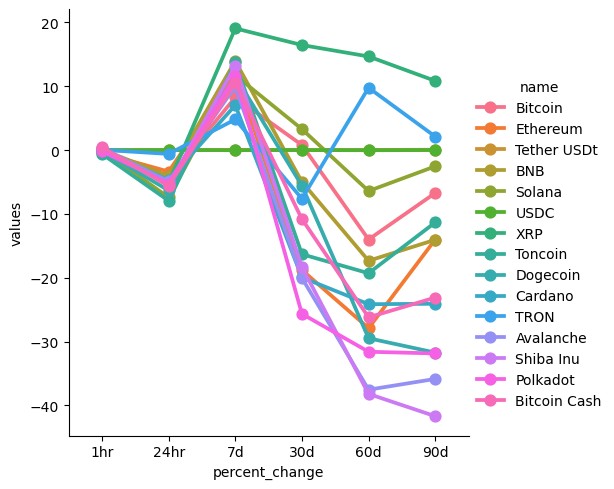

In [154]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [156]:
df10 = df[['name', 'quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,58366.87449,2024-08-12 09:44:31.195639


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

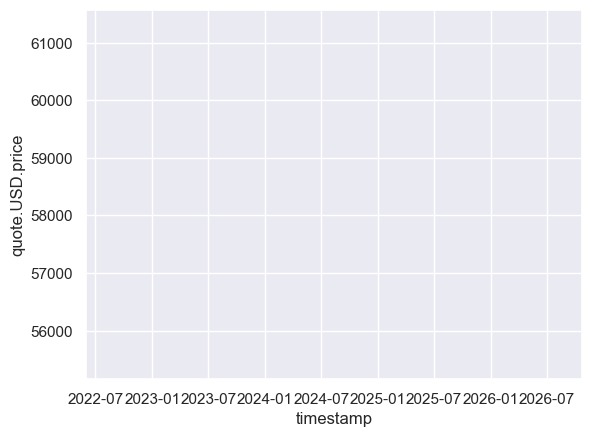

In [160]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)